In [7]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [8]:
cifar = loadmat('ML _dataset/cifar10_data_batch_1.mat')
cifar

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Jun  2 19:20:56 2009',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[ 59,  43,  50, ..., 140,  84,  72],
        [154, 126, 105, ..., 139, 142, 144],
        [255, 253, 253, ...,  83,  83,  84],
        ...,
        [ 71,  60,  74, ...,  68,  69,  68],
        [250, 254, 211, ..., 215, 255, 254],
        [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8),
 'labels': array([[6],
        [9],
        [9],
        ...,
        [1],
        [1],
        [5]], dtype=uint8),
 'batch_label': array(['training batch 1 of 5'], dtype='<U21')}

In [9]:
from sklearn.decomposition import PCA

In [10]:
X = cifar['data']
Y = cifar['labels']
X.shape,Y.shape

((10000, 3072), (10000, 1))

In [11]:
classes = np.unique(Y)
nclass = len(classes)
nclass

10

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

Text(0.5, 1.0, '(Label: frog)')


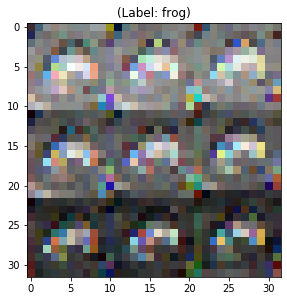

In [14]:
plt.figure(figsize=[10,10])
plt.subplot(122)
curr_img = np.reshape(X[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[Y[0][0]]) + ")"))

In [15]:
np.min(X),np.max(X)

(0, 255)

Check the maximum and minimum values of the CIFAR-10 training images and normalize the pixels between 0 and 1 inclusive.

In [16]:
X = X/255.0
np.min(X),np.max(X)
X.shape

(10000, 3072)

In [17]:
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(X)

In [18]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = Y

In [19]:
principal_cifar_Df

,principal component 1,principal component 2,y
0,-6.540640,-2.764517,6
1,0.661642,0.839839,9
2,7.689955,11.491546,9
3,-10.471734,-0.036836,4
4,-2.733191,4.846969,1
...,...,...,...
9995,-10.603738,-4.217274,3
9996,-2.677224,0.768622,9
9997,-1.295403,9.560498,1
9998,0.704348,-1.767745,1


In [20]:
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))

Explained variation per principal component: [0.29329263 0.11308157]


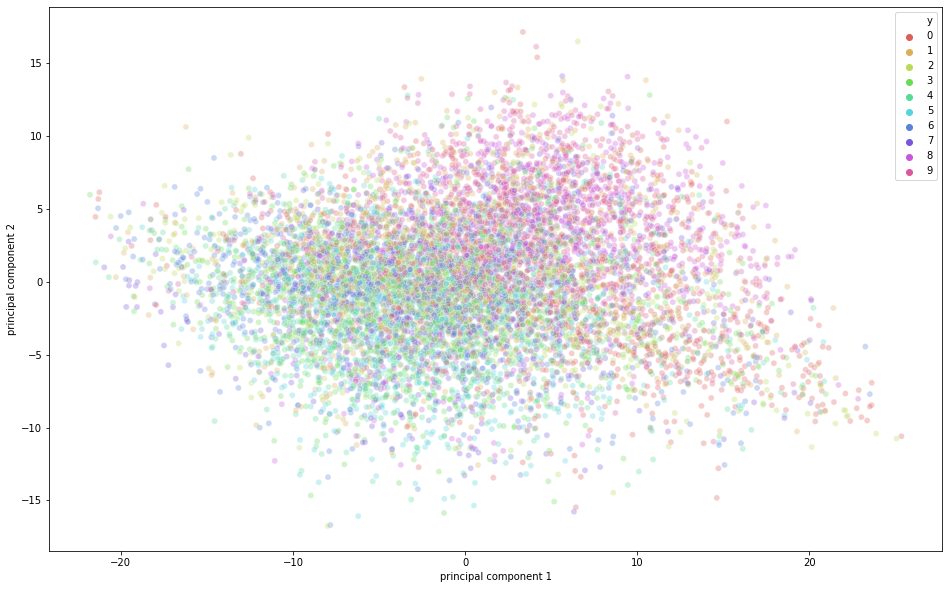

In [21]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)